# Método das diferenças finitas

### Bibliotecas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from functools import reduce
import sistemas_lineares.linsys as linsys

### Definição dos pontos

| i | x | y |
|:-:|:-:|:-:|
| 0 | 0,5 | 1 |
| 1 | 1 | 3 |
| 2 | 1.5 | 4 |
| 3 | 2 | 8 |

In [2]:
xi = [0.5,  1, 1.5,  2]
yi = [  1,  3,   4,  8]

## Limitação

Só pode ser aplicado se $\exists h | \forall i \in 0,1,\cdots,n-2, \  x_{i+1} - x_i = h$

### Definição do operador

$\Delta_{y_i}^{(n)}$: Diferença linear de ordem $n$, em $y_i$.

$⍋_{y_i}^{(n)} = \frac{\Delta_{y_i}^{(n)}}{n!h^n}$

$z = \frac{x-x_0}{h}$

$x - x_i = h(z-i)$


#### Definição geral:

$\Delta_{y_i}^{(0)} = y_i$

$\Delta_{y_i}^{(n)} = \Delta_{y_{i+1}}^{(n-1)} - \Delta_{y_i}^{(n-1)}$

In [3]:
h = xi[1]-xi[0]
z = lambda x : (x - xi[0])/h
linoperator = lambda n,i : yi[i] if n==0 else linoperator(n-1,i+1) - linoperator(n-1,i)

### Polinômio interpolador de newton para diferenças lineares

$$P_n(x) = y_0 + \sum_{i=1}^n \frac{\Delta_{y_0}^{(i)}}{i!} \prod_{j=0}^{i-1} (z-j)$$

In [4]:
polnewton = lambda x : yi[0]+sum((linoperator(i,0)/np.math.factorial(i))*reduce(lambda a,b : a*b, [z(x)-j for j in range(i)], 1) for i in range(1,len(xi)))

v = 1.6
vb = polnewton(v)

print(vb)

4.432


#### Gráfico do polinômio interpolado

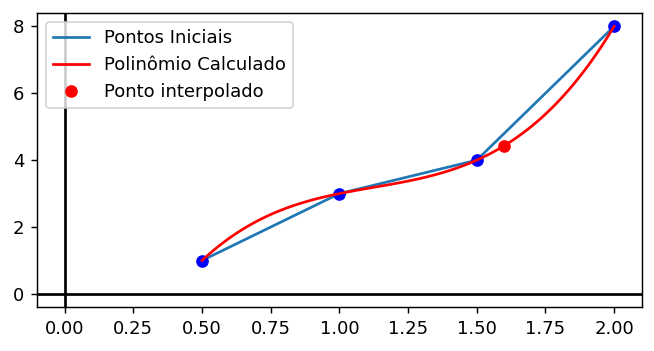

In [5]:
plt.figure(figsize=(6, 3), dpi=130)

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(xi, yi, label="Pontos Iniciais")

xarr = np.linspace(xi[0],xi[-1],100)

for px,py in zip(xi,yi) : plt.plot(px, py, 'bo')

plt.plot(xarr,polnewton(xarr),color='red', label="Polinômio Calculado")

plt.plot(v, vb, 'ro', label="Ponto interpolado")

plt.legend(loc="upper left")

plt.show()